In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
import sklearn

# Data Reading

In [6]:
train = pd.read_csv('train_2v.csv')
test = pd.read_csv('test_2v.csv')
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0.0,0.0,No,children,Rural,95.12,18.0,NaN,0.0
1,30468,Male,58.0,1.0,0.0,Yes,Private,Urban,87.96,39.2,never smoked,0.0
2,16523,Female,8.0,0.0,0.0,No,Private,Urban,110.89,17.6,NaN,0.0
3,56543,Female,70.0,0.0,0.0,Yes,Private,Rural,69.04,35.9,formerly smoked,0.0
4,46136,Male,14.0,0.0,0.0,No,Never_worked,Rural,161.28,19.1,NaN,0.0


In [7]:
test.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,36306,Male,80.0,0,0,Yes,Private,Urban,83.84,21.1,formerly smoked
1,61829,Female,74.0,0,1,Yes,Self-employed,Rural,179.50,26.0,formerly smoked
2,14152,Female,14.0,0,0,No,children,Rural,95.16,21.2,NaN
3,12997,Male,28.0,0,0,No,Private,Urban,94.76,23.4,NaN
4,40801,Female,63.0,0,0,Yes,Govt_job,Rural,83.57,27.6,never smoked


In [8]:
train.shape

(17257, 12)

In [9]:
test.shape

(18601, 11)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17257 entries, 0 to 17256
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 17257 non-null  int64  
 1   gender             17257 non-null  object 
 2   age                17256 non-null  float64
 3   hypertension       17256 non-null  float64
 4   heart_disease      17256 non-null  float64
 5   ever_married       17256 non-null  object 
 6   work_type          17256 non-null  object 
 7   Residence_type     17256 non-null  object 
 8   avg_glucose_level  17256 non-null  float64
 9   bmi                16682 non-null  float64
 10  smoking_status     12021 non-null  object 
 11  stroke             17256 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.6+ MB


# Data Cleaning


**Identifing missing attributes**

In [12]:
train_missing_values=train.isnull().sum()
train_missing_values

id                      0
gender                  0
age                     1
hypertension            1
heart_disease           1
ever_married            1
work_type               1
Residence_type          1
avg_glucose_level       1
bmi                   575
smoking_status       5236
stroke                  1
dtype: int64

In [13]:
test_missing_values=test.isnull().sum()
test_missing_values

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   591
smoking_status       5751
dtype: int64

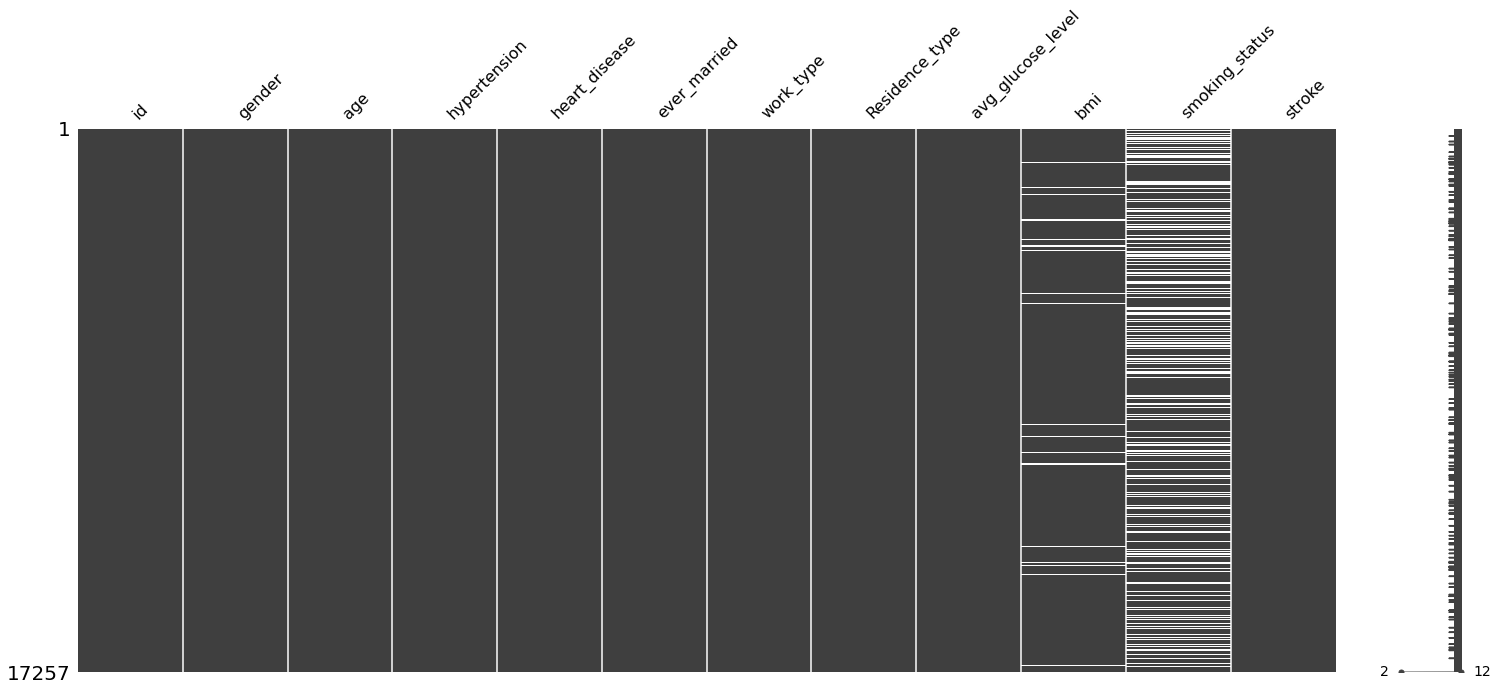

In [14]:
ms.matrix(train)

**Removing missing values**

In [15]:
train_data=train.dropna(axis=0,how="any")
test_data=test.dropna(axis=0,how="any")
print('train data shape: {}' .format(train_data.shape))
print('test data shape: {}' .format(test_data.shape))

train data shape: (11610, 12)
test data shape: (12423, 11)


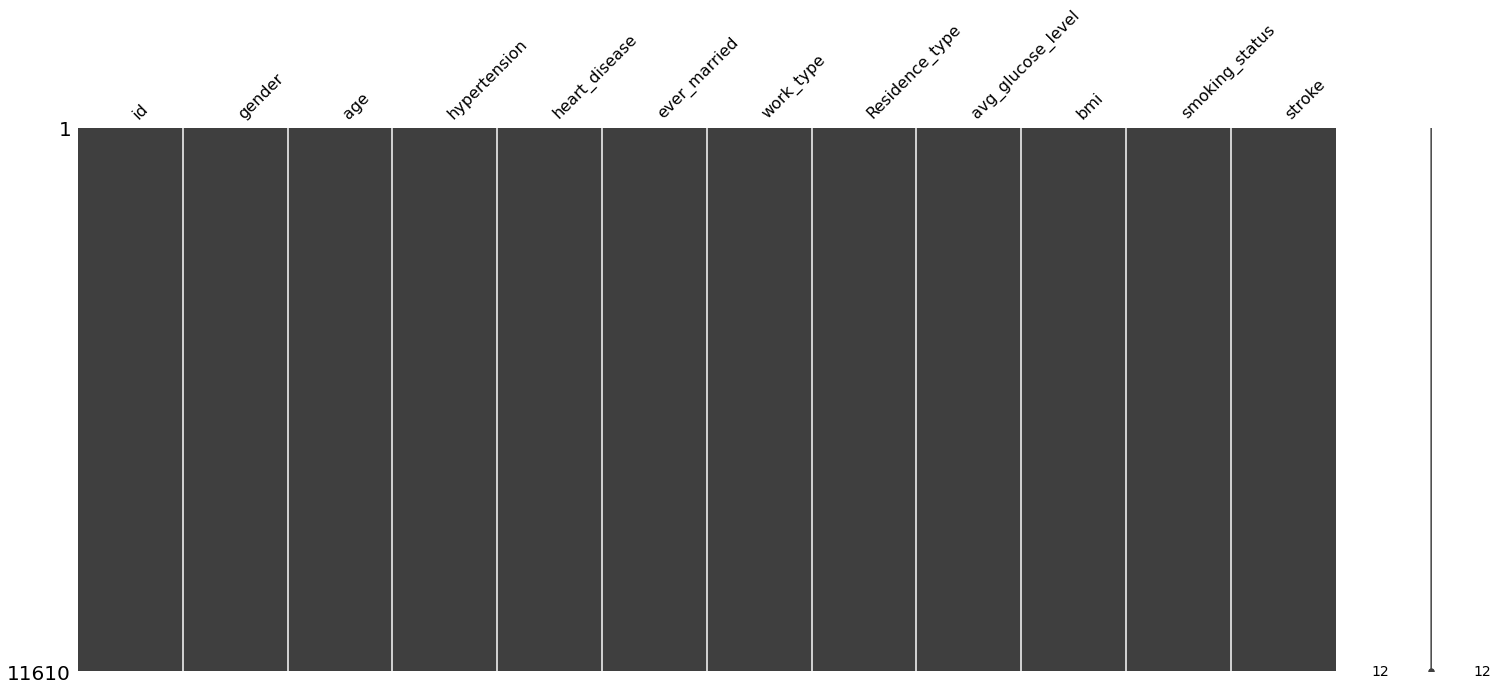

In [16]:
ms.matrix(train_data)

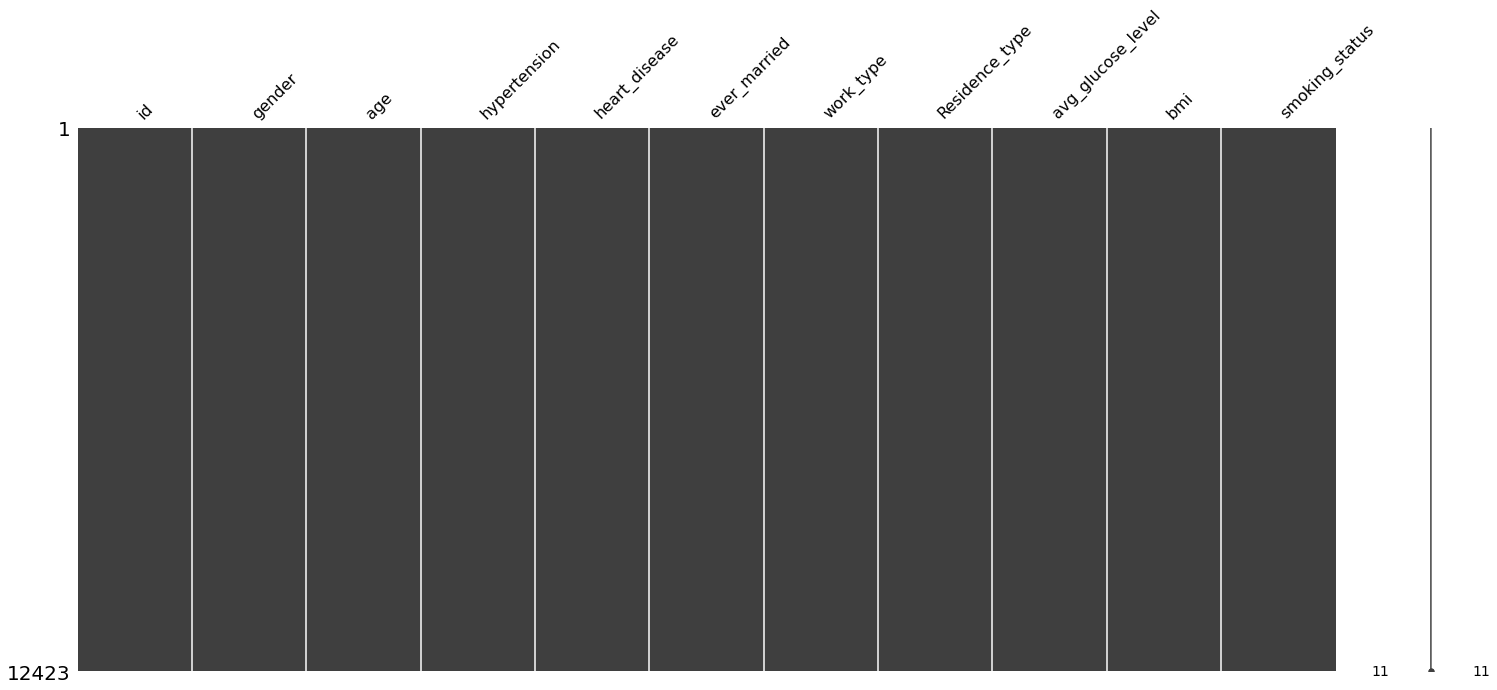

In [17]:
ms.matrix(test_data)

In [32]:
train_data.drop('id',axis=1,inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [33]:
train_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Male,58.0,1.0,0.0,Yes,Private,Urban,87.96,39.2,never smoked,0.0
3,Female,70.0,0.0,0.0,Yes,Private,Rural,69.04,35.9,formerly smoked,0.0
6,Female,52.0,0.0,0.0,Yes,Private,Urban,77.59,17.7,formerly smoked,0.0
7,Female,75.0,0.0,1.0,Yes,Self-employed,Rural,243.53,27.0,never smoked,0.0
8,Female,32.0,0.0,0.0,Yes,Private,Rural,77.67,32.3,smokes,0.0


# Pattern Recognition

In [34]:
train_data["stroke"].value_counts()

0.0    11406
1.0      204
Name: stroke, dtype: int64

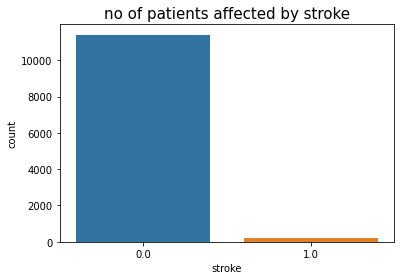

In [35]:
sns.countplot(x=train_data["stroke"])
plt.title("no of patients affected by stroke", fontsize=15)
plt.show()

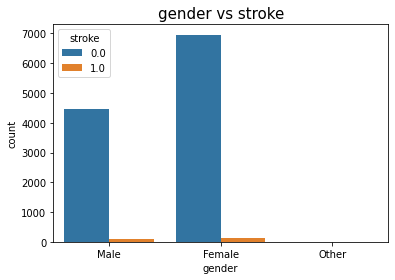

In [36]:
sns.countplot(x=train_data["gender"], hue=train_data["stroke"])
plt.title("gender vs stroke", fontsize=15)
plt.show()

In [37]:
train_data.groupby(["gender"])["stroke"].value_counts()


gender  stroke
Female  0.0       6957
        1.0        119
Male    0.0       4448
        1.0         85
Other   0.0          1
Name: stroke, dtype: int64

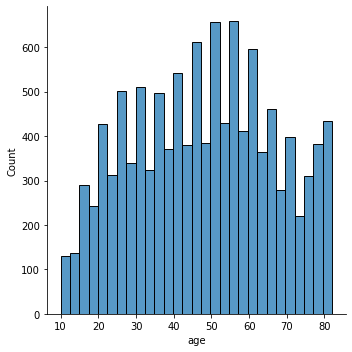

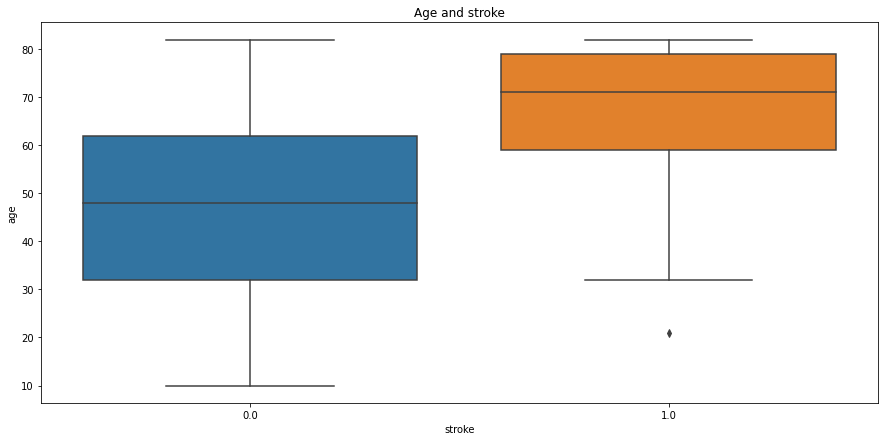

In [43]:
train_data['age'].nunique()
# Returns number of unique values in this attribute
sns.displot(train_data['age'])
# This will plot a distribution plot of variable age
plt.figure(figsize=(15,7))
plt.title('Age and stroke')
sns.boxplot(data=train_data,x='stroke',y='age')
# Above code will plot a boxplot of variable age with respect of target attribute stroke

People aged more than 60 years tend to have a stroke. Some outliers can be seen as people below age 20 are having a stroke it might be possible that it’s valid data as stroke also depends on our eating and living habits. Another observation is people not having strokes also consist of people age > 60 years.

In [41]:
train_data["smoking_status"].value_counts()

never smoked       6304
formerly smoked    2828
smokes             2478
Name: smoking_status, dtype: int64

In [ ]:
train_data.groupby(["gender"])["smoking_status"].value_counts()


gender  smoking_status 
Female  never smoked       10406
        formerly smoked     3926
        smokes              3520
Male    never smoked        5340
        formerly smoked     3167
        smokes              2706
Other   formerly smoked        6
        never smoked           1
Name: smoking_status, dtype: int64

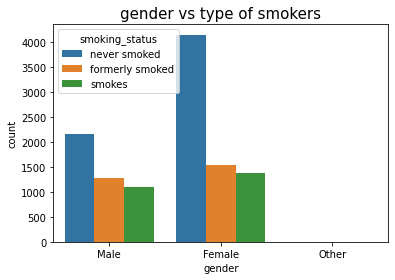

Text(0.5, 1.0, 'smokers and stroke')

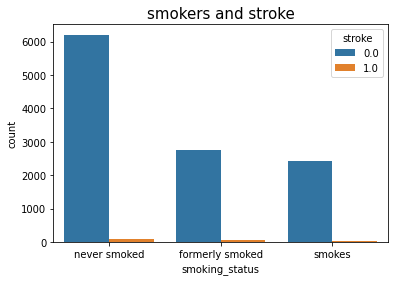

In [51]:
sns.countplot(x=train_data["gender"], hue=train_data["smoking_status"])
plt.title("gender vs type of smokers", fontsize=15)
plt.show()
sns.countplot(data=train_data,x='smoking_status',hue='stroke')
plt.title("smokers and stroke", fontsize=15)

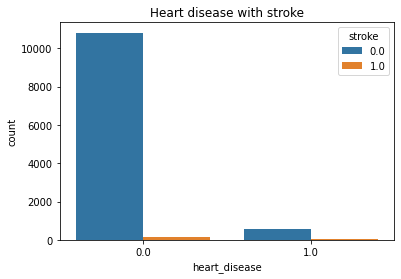

Value Counts
 0.0    10976
1.0      634
Name: heart_disease, dtype: int64


In [52]:
sns.countplot(x=train_data["heart_disease"],hue=train_data["stroke"])
plt.title('Heart disease with stroke')
plt.show()
print('Value Counts\n',train_data['heart_disease'].value_counts())

Unique Value
 ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Value Counts
 Private          7536
Self-employed    2090
Govt_job         1702
children          237
Never_worked       45
Name: work_type, dtype: int64


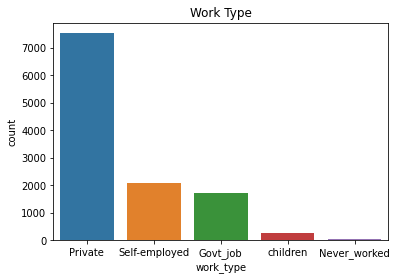

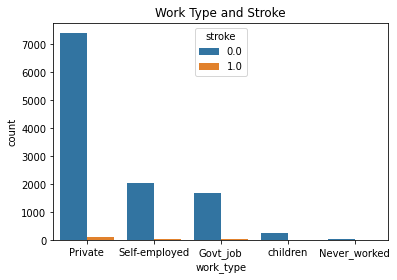

In [62]:
print('Unique Value\n',train_data['work_type'].unique())
print('Value Counts\n',train_data['work_type'].value_counts())
sns.countplot(data=train_data,x='work_type')
plt.title('Work Type')
plt.show()
sns.countplot(data=train_data,x='work_type',hue='stroke')
plt.title('Work Type and Stroke')
plt.show()

### conversion of string type to int type

In [63]:
str_data=train_data.select_dtypes(include=['object'])
str_dt=test_data.select_dtypes(include=['object'])

In [64]:
int_data=train_data.select_dtypes(include=['integer', 'float'])
int_dt=test_data.select_dtypes(include=['integer', 'float'])


In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
label=LabelEncoder()
features=str_data.apply(label.fit_transform)
features=features.join(int_data)
features.head()

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
1,1,1,2,1,1,58.0,1.0,0.0,87.96,39.2,0.0
3,0,1,2,0,0,70.0,0.0,0.0,69.04,35.9,0.0
6,0,1,2,1,0,52.0,0.0,0.0,77.59,17.7,0.0
7,0,1,3,0,1,75.0,0.0,1.0,243.53,27.0,0.0
8,0,1,2,0,2,32.0,0.0,0.0,77.67,32.3,0.0


In [69]:
test1=str_dt.apply(label.fit_transform)
Test=test1.join(int_dt)
Test.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi
0,1,1,2,1,0,36306,80.0,0,0,83.84,21.1
1,0,1,3,0,0,61829,74.0,0,1,179.50,26.0
4,0,1,0,0,1,40801,63.0,0,0,83.57,27.6
5,0,1,2,1,1,9348,66.0,1,0,219.98,32.2
7,1,1,0,1,1,60512,46.0,0,0,120.80,32.5


In [70]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12423 entries, 0 to 18599
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             12423 non-null  int64  
 1   ever_married       12423 non-null  int64  
 2   work_type          12423 non-null  int64  
 3   Residence_type     12423 non-null  int64  
 4   smoking_status     12423 non-null  int64  
 5   id                 12423 non-null  int64  
 6   age                12423 non-null  float64
 7   hypertension       12423 non-null  int64  
 8   heart_disease      12423 non-null  int64  
 9   avg_glucose_level  12423 non-null  float64
 10  bmi                12423 non-null  float64
dtypes: float64(3), int64(8)
memory usage: 1.4 MB


# Modelling & predicting the data

In [68]:
xtrain=features.drop(["stroke"],axis=1)
xtrain.shape

(11610, 10)

In [71]:
ytrain=features["stroke"]
ytrain.head()
ytrain.shape

(11610,)

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(xtrain, ytrain)

In [73]:
x_test.shape

(2903, 10)

In [74]:
y_test.shape

(2903,)

In [75]:
x_train.head()

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi
6612,1,0,0,1,1,17.0,0.0,0.0,99.59,28.6
7858,1,0,2,0,2,47.0,0.0,0.0,90.53,22.8
8063,0,1,2,0,1,24.0,0.0,0.0,68.71,30.3
10679,1,1,2,0,1,51.0,0.0,0.0,224.77,26.7
6720,0,1,3,1,1,56.0,0.0,0.0,65.10,37.1


In [76]:
y_train.head()

6612     0.0
7858     0.0
8063     0.0
10679    0.0
6720     0.0
Name: stroke, dtype: float64

# Normalize 


In [82]:
x_train.describe()

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi
count,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000
mean,0.393017,0.748593,1.920983,0.506144,0.972206,47.789939,0.112323,0.055932,106.715071,30.137315
std,0.488684,0.433847,0.919805,0.499991,0.675391,18.708044,0.315782,0.229804,45.739226,7.331524
min,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,55.040000,10.800000
25%,0.000000,0.000000,2.000000,0.000000,1.000000,33.000000,0.000000,0.000000,77.725000,25.000000
50%,0.000000,1.000000,2.000000,1.000000,1.000000,48.000000,0.000000,0.000000,91.970000,28.900000
75%,1.000000,1.000000,2.000000,1.000000,1.000000,62.000000,0.000000,0.000000,114.160000,34.000000
max,2.000000,1.000000,4.000000,1.000000,2.000000,82.000000,1.000000,1.000000,281.180000,92.000000


In [80]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [81]:
x_train_std=std.fit_transform(x_train)
x_test_std=std.transform(x_test)

In [85]:
x_train_std

array([[ 1.24214846, -1.72557682, -2.08858754, ..., -0.24340448,
        -0.15578488, -0.2096976 ],
       [ 1.24214846, -1.72557682,  0.08591105, ..., -0.24340448,
        -0.35387569, -1.00084727],
       [-0.80428232,  0.57951636,  0.08591105, ..., -0.24340448,
        -0.83095533,  0.02219109],
       ...,
       [-0.80428232,  0.57951636,  0.08591105, ..., -0.24340448,
         0.46866032, -0.57799141],
       [-0.80428232, -1.72557682,  0.08591105, ..., -0.24340448,
        -0.5782037 , -1.1645334 ],
       [ 1.24214846,  0.57951636,  0.08591105, ..., -0.24340448,
         2.20840489,  2.4092806 ]])

In [86]:
x_test_std

array([[-0.80428232,  0.57951636,  0.08591105, ..., -0.24340448,
        -0.68512026, -0.34610272],
       [ 1.24214846,  0.57951636,  0.08591105, ..., -0.24340448,
        -0.50058533,  0.02219109],
       [-0.80428232,  0.57951636,  0.08591105, ..., -0.24340448,
        -0.31779955, -0.15513556],
       ...,
       [ 1.24214846,  0.57951636,  1.17316034, ...,  4.10838777,
        -0.64051703, -0.38702425],
       [-0.80428232,  0.57951636,  0.08591105, ..., -0.24340448,
        -0.72228962, -0.79623959],
       [-0.80428232,  0.57951636,  1.17316034, ..., -0.24340448,
         2.48367678,  0.58145206]])

## Naive_Bayes

In [102]:
x_test.head()

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi
10718,0,1,2,1,2,53.0,0.0,0.0,75.38,27.6
10132,1,1,2,0,0,49.0,0.0,0.0,83.82,30.3
9765,0,1,2,1,1,68.0,0.0,0.0,92.18,29.0
5595,0,0,2,1,1,31.0,0.0,0.0,108.69,33.5
10770,0,1,2,0,1,66.0,1.0,1.0,112.59,29.1


In [103]:
y_test.head()

10718    0.0
10132    0.0
9765     0.0
5595     0.0
10770    0.0
Name: stroke, dtype: float64

In [272]:
from sklearn.naive_bayes import GaussianNB

In [278]:
model=GaussianNB()
model.fit(x_train_std,y_train)

GaussianNB()

In [279]:
y_predict=model.predict(x_test_std)
y_predict

array([0., 0., 0., ..., 0., 0., 0.])

In [280]:
nb_score=model.score(x_test_std, y_predict)
print("NBtest_score:", nb_score)   


NBtest_score: 1.0


### Confusion matrix

In [125]:
nb_conf_mtr=pd.crosstab(y_test, y_predict)
nb_conf_mtr

col_0,0.0,1.0
stroke,,
0.0,2669,183
1.0,36,15


### Report for Naive_Bayes 

In [199]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


In [131]:
nbreport=classification_report(y_test, y_predict)
print(nbreport)

              precision    recall  f1-score   support

         0.0       0.99      0.94      0.96      2852
         1.0       0.08      0.29      0.12        51

    accuracy                           0.92      2903
   macro avg       0.53      0.61      0.54      2903
weighted avg       0.97      0.92      0.95      2903



## Decision tree

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [282]:
dt_mod=DecisionTreeClassifier()
dt_mod.fit(x_train_std, y_train)

DecisionTreeClassifier()

In [98]:
y_predict=dt_mod.predict(x_test_std)
y_predict

array([0., 0., 0., ..., 0., 1., 0.])

In [201]:
ts_dt_score=dt_mod.score(x_test_std, y_test)
print("Decision tree test score:", ts_dt_score)

Decision tree test score: 0.9672752325180848


### Reports for decision tree

In [132]:
dectree_report=classification_report(y_test, y_predict)
print(dectree_report)

              precision    recall  f1-score   support

         0.0       0.99      0.94      0.96      2852
         1.0       0.08      0.29      0.12        51

    accuracy                           0.92      2903
   macro avg       0.53      0.61      0.54      2903
weighted avg       0.97      0.92      0.95      2903



In [133]:
dt_conf_mtr=pd.crosstab(y_test, y_predict)
dt_conf_mtr

col_0,0.0,1.0
stroke,,
0.0,2669,183
1.0,36,15



### Random Forest

In [184]:

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 100)

In [267]:
rfc.fit(x_train_std,y_train)


RandomForestClassifier()

In [191]:
y_pred_rfc = rfc.predict(x_test_std)

In [192]:
rfc_score=rfc.score(x_test_std,y_pred_rfc)
rfc_score

1.0

In [193]:
print(pd.crosstab(y_test,y_pred_rfc))
print(classification_report(y_test,y_pred_rfc))

col_0    0.0  1.0
stroke           
0.0     2853    1
1.0       49    0
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2854
         1.0       0.00      0.00      0.00        49

    accuracy                           0.98      2903
   macro avg       0.49      0.50      0.50      2903
weighted avg       0.97      0.98      0.97      2903



#Logistic Regression

In [142]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [240]:
lr.fit(x_train_std,y_train)
print("Total time: ", time.time() - start, "seconds")

Total time:  121.68260383605957 seconds


In [146]:
y_pred_lr=lr.predict(x_test_std)



In [217]:
lr_score=lr.score(x_test_std,y_test)

In [218]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2854
         1.0       0.00      0.00      0.00        49

    accuracy                           0.98      2903
   macro avg       0.49      0.50      0.50      2903
weighted avg       0.97      0.98      0.97      2903



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


kNN


In [170]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [239]:
knn.fit(x_train_std,y_train)
print("Total time: ", time.time() - start, "seconds")

Total time:  117.27101397514343 seconds


In [175]:
y_pred=knn.predict(x_test_std)

In [203]:
ac_knn=knn.score(x_test_std,y_pred)
ac_knn

1.0

In [202]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2854
         1.0       0.00      0.00      0.00        49

    accuracy                           0.98      2903
   macro avg       0.49      0.50      0.50      2903
weighted avg       0.97      0.98      0.97      2903



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


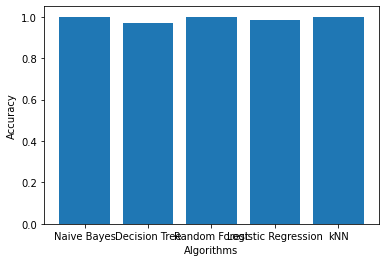

In [220]:
plt.bar(['Naive Bayes','Decision Tree','Random Forest','Logistic Regression','kNN'],[nb_score,ts_dt_score,rfc_score,lr_score,ac_knn])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()